In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
import obspy
import datetime

In [7]:
def slice_waveforms(st, starttime, endtime):
    '''plot sliced waveform
    starttime and endtime in UTCDateTime format'''
    # convert the format of the data
    st_cut = st.slice(starttime,endtime)
    delta_t = st.stats.delta
    print(st_cut.stats)
    waveform_data = st_cut.data
    waveform_time = np.arange(st_cut.stats.npts)*delta_t
    %matplotlib inline
    plt.plot(waveform_time, waveform_data)
    plt.show()
    
    return st_cut, waveform_data, waveform_time


         network: IU
         station: KIP
        location: 00
         channel: BH1
       starttime: 2018-01-01T00:00:00.019538Z
         endtime: 2018-01-02T00:00:00.019538Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 1728001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 30858, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 512, 'filesize': 15799296})


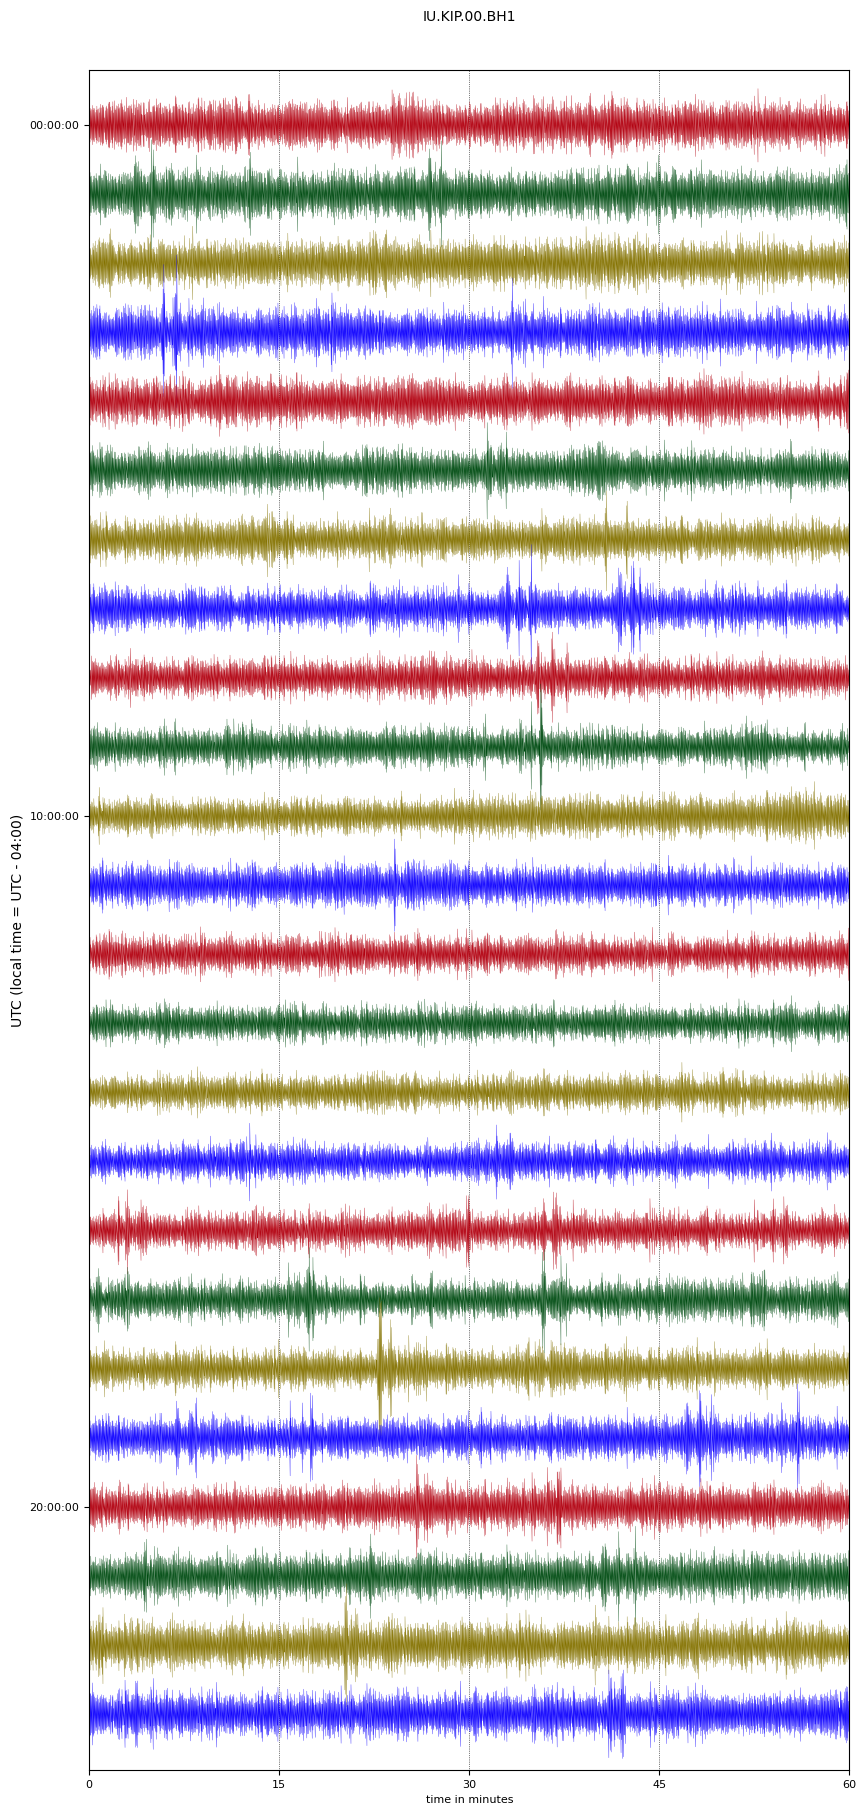

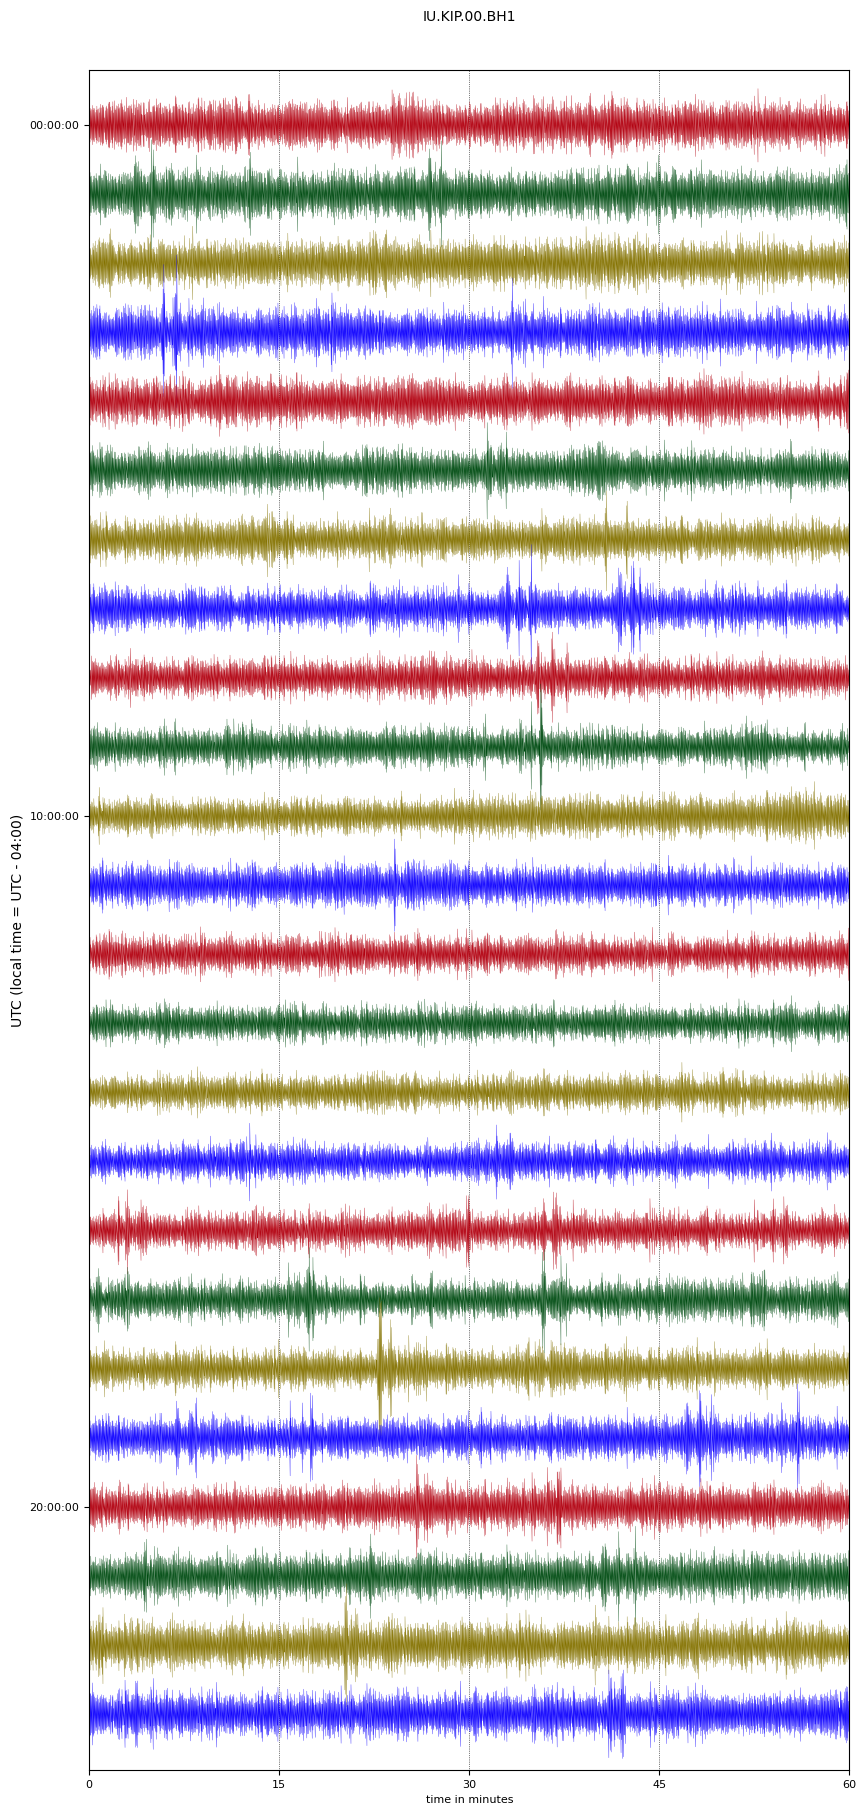

In [125]:
working_dir = '/Users/Yin9xun/Work/island_stations/waveforms'
st = obspy.read(working_dir + '/*KIP*BH1*.mseed')
print(st[0].stats)
st = st.filter('highpass', freq=8, corners=2, zerophase=True)
st.plot(type='dayplot',interval=60, size=(1000,2000), linewidth=0.25)

         network: IU
         station: KIP
        location: 00
         channel: BH1
       starttime: 2018-01-01T00:00:00.019538Z
         endtime: 2018-01-01T00:30:00.019538Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 36001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 30858, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 512, 'filesize': 15799296})
      processing: ["ObsPy 1.2.2: filter(options={'freq': 8, 'corners': 2, 'zerophase': True}::type='highpass')", 'ObsPy 1.2.2: trim(endtime=UTCDateTime(2018, 1, 1, 0, 30, 0, 19538)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2018, 1, 1, 0, 0, 0, 19538))']


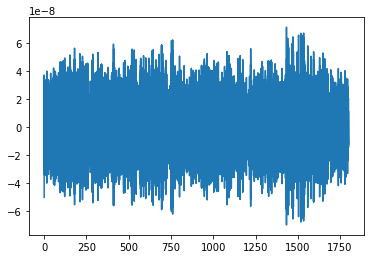

In [126]:
# convert the format of the data
starttime = st[0].stats.starttime
endtime = starttime + 1800
st_cut, waveform_data, waveform_time = slice_waveforms(st[0], starttime, endtime)

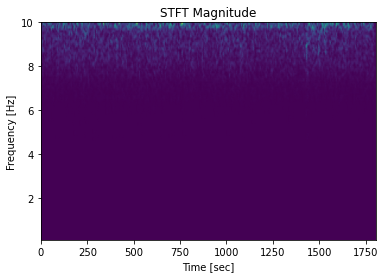

In [127]:
fs = st_cut.stats.sampling_rate
f, t, Zxx = signal.stft(waveform_data, fs=fs, nperseg=256)
plt.figure()
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.ylim([f[1], f[-1]])
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.yscale('linear')
plt.show()

In [131]:
amp = np.amax(st[0].data)
Zxx_sig = np.where(np.abs(Zxx) >= amp/40, Zxx, 0)
_, xrec_sig = signal.istft(Zxx_sig, fs)
xrec_sig = np.interp(np.arange(len(waveform_time)), np.arange(len(xrec_sig)),xrec_sig)

Zxx_noise = np.where(np.abs(Zxx) < amp/40, Zxx, 0)
_, xrec_noise = signal.istft(Zxx_noise, fs)
xrec_noise = np.interp(np.arange(len(waveform_time)), np.arange(len(xrec_noise)),xrec_noise)

In [132]:
np.amax(np.abs(Zxx))

2.2808495128441989e-08

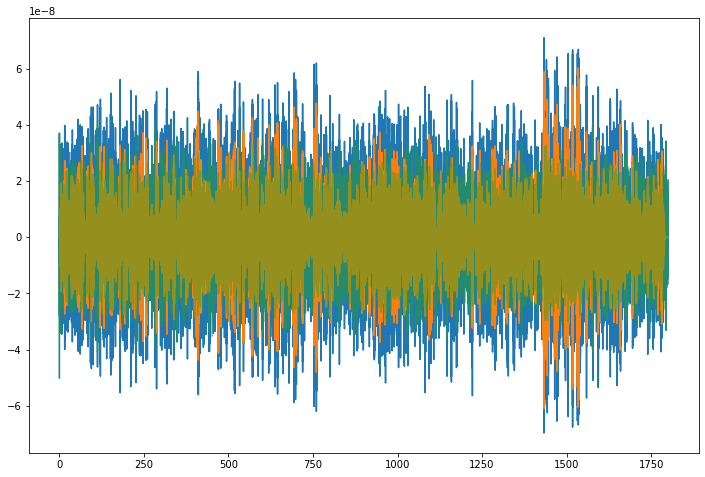

In [133]:
%matplotlib inline
plt.figure(figsize=(12,8))
plt.plot(waveform_time, waveform_data)
plt.plot(waveform_time,xrec_sig)
plt.plot(waveform_time, xrec_noise, alpha=0.5)
#plt.xlim(1400,1450)

In [322]:
mwf = pywt.ContinuousWavelet('cgau2').wavefun()

ValueError: Number of samples, -9223372036854775808, must be non-negative.

In [318]:
mwf[0].shape

(256,)

In [321]:
pywt.ContinuousWavelet.wavefun?

In [ ]:
pywt.ContinuousWavelet().wavefun

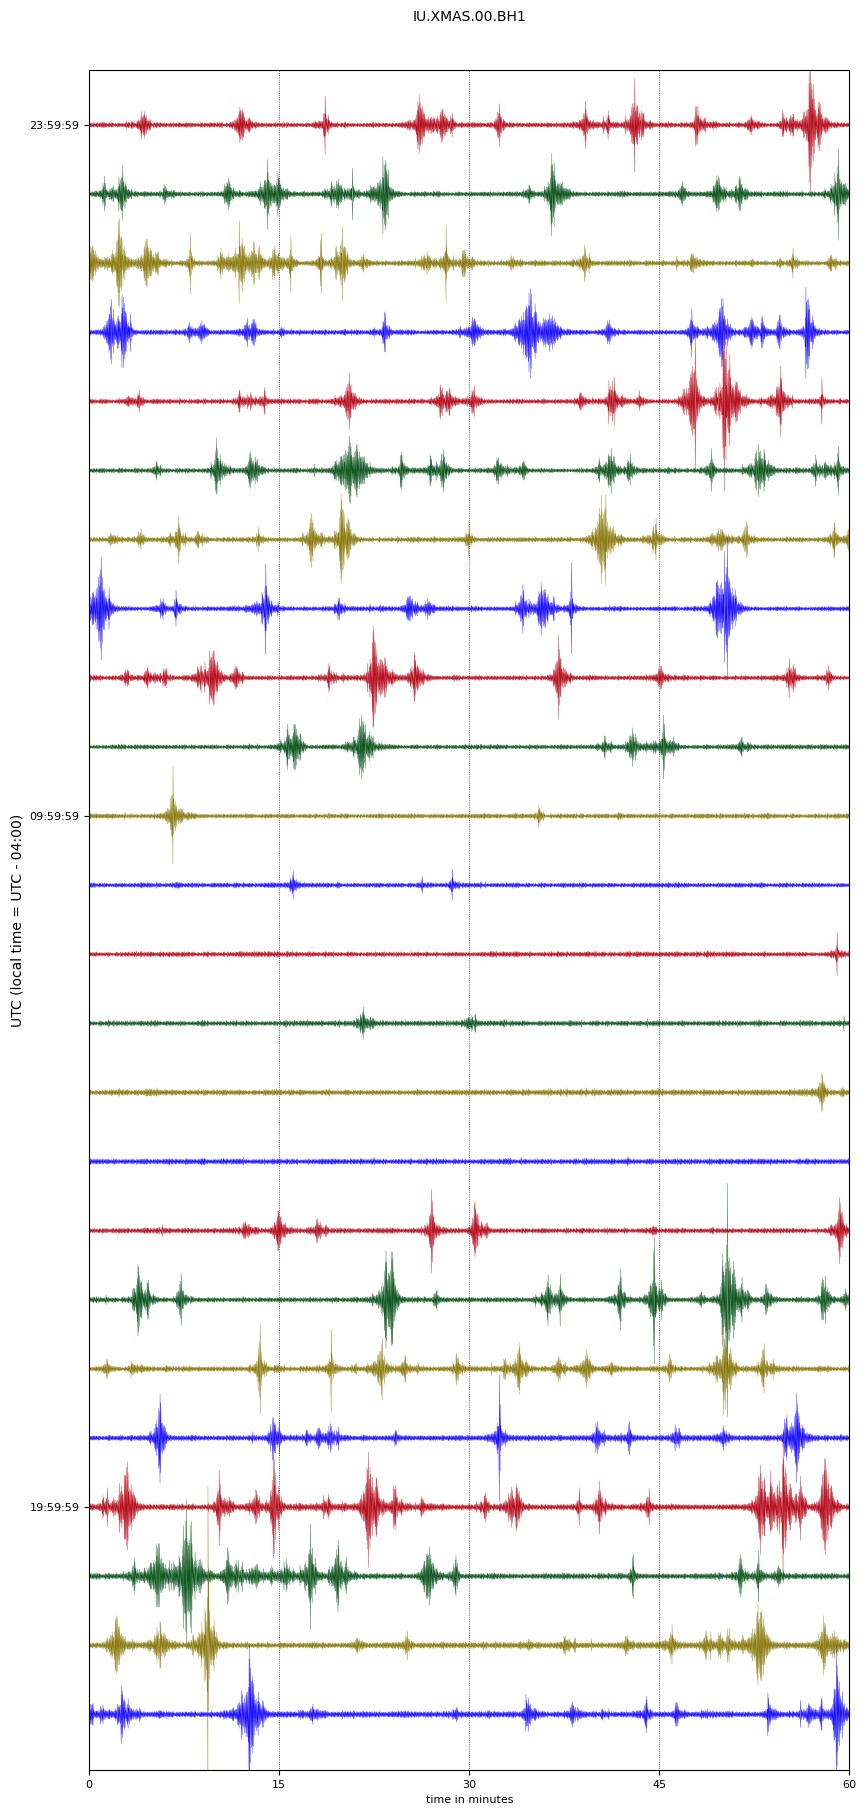

         network: IU
         station: XMAS
        location: 00
         channel: BH1
       starttime: 2017-12-31T23:59:59.994538Z
         endtime: 2018-01-01T23:59:59.994538Z
   sampling_rate: 40.0
           delta: 0.025
            npts: 3456001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 61715, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 512, 'filesize': 31598080})
      processing: ["ObsPy 1.2.2: filter(options={'freq': 8, 'corners': 4, 'zerophase': True}::type='highpass')"]


In [289]:
working_dir = '/Users/Yin9xun/Work/island_stations/waveforms'
st = obspy.read(working_dir + '/*XMAS*BH1*.mseed')
st = st.filter('highpass', freq=8, corners=4, zerophase=True)
st.plot(type='dayplot',interval=60, size=(1000,2000), linewidth=0.25)
N_scale = 512
print(st[0].stats)

starttime = st[0].stats.starttime.datetime
endtime = (st[0].stats.starttime + 60).datetime
freq_sample = st[0].stats.sampling_rate
delta_t = st[0].stats.delta

         network: IU
         station: XMAS
        location: 00
         channel: BH1
       starttime: 2018-01-01T18:19:59.994538Z
         endtime: 2018-01-01T18:29:59.994538Z
   sampling_rate: 40.0
           delta: 0.025
            npts: 24001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 61715, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 512, 'filesize': 31598080})
      processing: ["ObsPy 1.2.2: filter(options={'freq': 8, 'corners': 4, 'zerophase': True}::type='highpass')", 'ObsPy 1.2.2: trim(endtime=UTCDateTime(2018, 1, 1, 18, 29, 59, 994538)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2018, 1, 1, 18, 19, 59, 994538))']


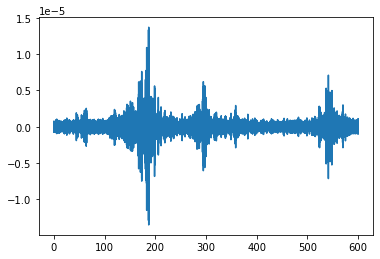

In [291]:
# convert the format of the data
starttime = st[0].stats.starttime+18 * 3600 + 20 * 60
endtime = starttime + 600
st_cut = st[0].slice(starttime,endtime)
print(st_cut.stats)
waveform_data = st_cut.data
waveform_time = np.arange(st_cut.stats.npts)*delta_t
%matplotlib inline
plt.plot(waveform_time, waveform_data)
plt.show()

In [ ]:
def wavelet_transform_waveform(waveform_time, waveform_data, wavelet='cgau2', N_scale=512):
    
    delta_t = waveform_time[1] - waveform_time[0]
    coef, freqs = pywt.cwt(waveform_data, np.arange(1,N_scale+1),wavelet, sampling_period=delta_t)
    
    %matplotlib inline
    time_grid, freqs_grid = np.meshgrid(waveform_time, freqs)
    fig, ax = plt.subplots(2,1,sharex=True,figsize=(15,15))
    ax[0].plot(waveform_time, waveform_data)

    ax[1].pcolormesh(time_grid, freqs_grid, np.log10(abs(coef)), shading='auto',)
    ax[1].set_yscale('log')
    
    return coef, freqs

In [292]:
coef, freqs = pywt.cwt(waveform_data, np.arange(1,N_scale+1),'cgau2', sampling_period=delta_t)

In [293]:
%matplotlib inline
time_grid, freqs_grid = np.meshgrid(waveform_time, freqs)

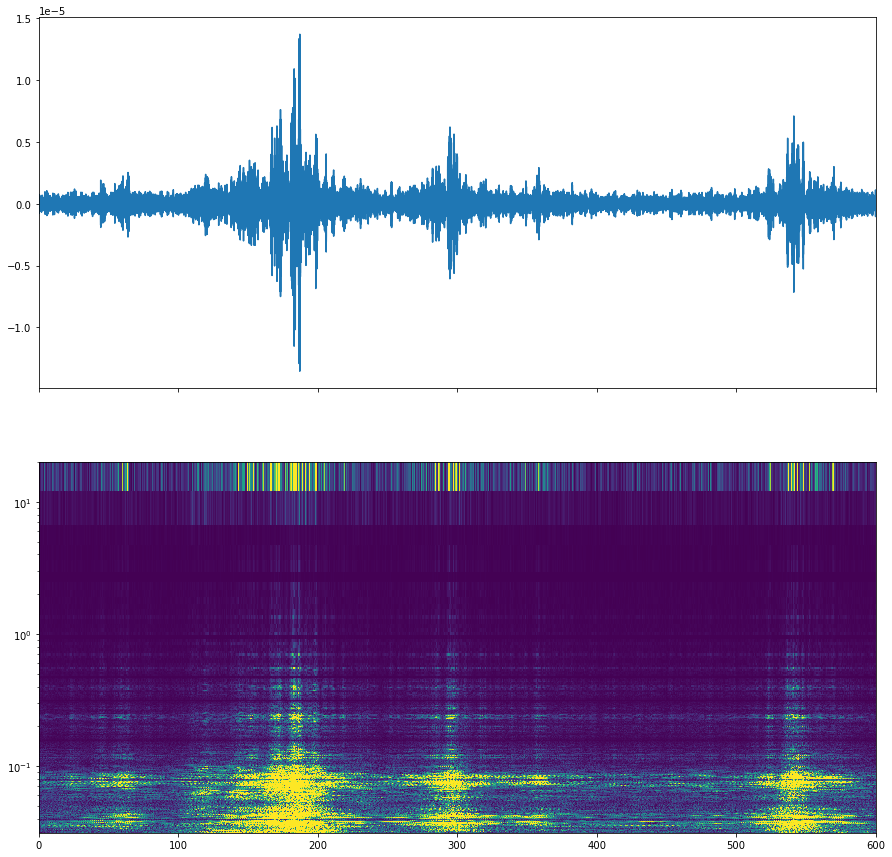

In [300]:
fig, ax = plt.subplots(2,1,sharex=True,figsize=(15,15))
ax[0].plot(waveform_time, waveform_data)

ax[1].pcolormesh(time_grid, freqs_grid, abs(coef), shading='auto',vmax=np.amax(abs(coef))*0.1)
ax[1].set_yscale('log')

(0.01, 20)

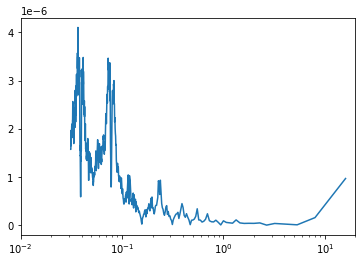

In [245]:
%matplotlib inline
sum_time = np.mean(abs(coef),axis=1)
#plt.plot(np.arange(N_scale,0,-1),sum_time)
plt.semilogx(freqs,sum_time)
ax = plt.gca()
#ax.set_ylim(0,0.00001)
ax.set_xlim(1e-2,20)

In [ ]:
# cut one hour long data
# apply the CWT to the data

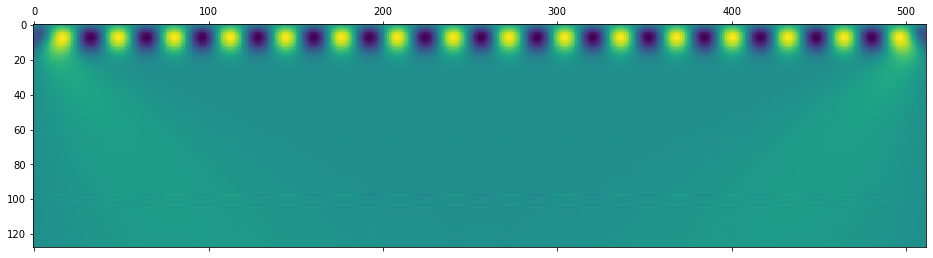

In [2]:
import pywt
x = np.arange(512)
y = np.sin(2*np.pi*x/32)
coef, freqs = pywt.cwt(y, np.arange(1,129),'gaus1')
plt.matshow(coef)
plt.show()

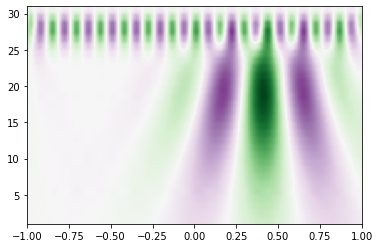

In [4]:
t = np.linspace(-1, 1, 200, endpoint=False)
sig = np.cos(2 * np.pi * 7 * t) + np.real(np.exp(-7 * (t - 0.4) ** 2)
            * np.exp(1j * 2 * np.pi * 2 * (t-0.4)))
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(sig, widths, 'mexh')
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
          vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

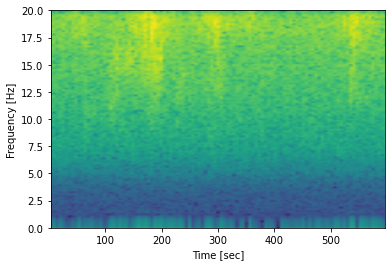

In [326]:
fs = st_cut.stats.sampling_rate
f, t, Sxx = signal.spectrogram(waveform_data, fs=fs)
plt.pcolormesh(t, f, np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

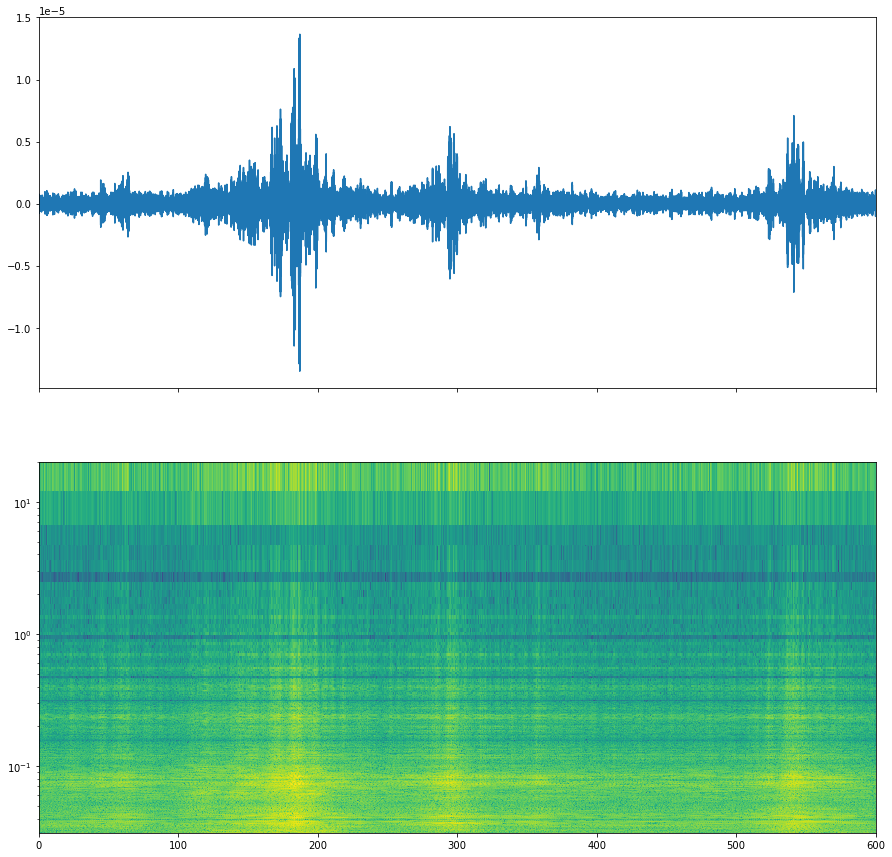

In [311]:
N_scale = 512
coef, freqs = wavelet_transform_waveform(waveform_time, waveform_data, wavelet='cgau2', N_scale=N_scale)

(0.01, 10)

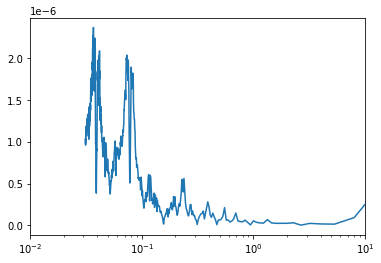

In [312]:
%matplotlib inline
mean_coef = np.mean(abs(coef),axis=1)
#plt.plot(np.arange(N_scale,0,-1),sum_time)
plt.semilogx(freqs,mean_coef)
ax = plt.gca()
#ax.set_ylim(0,0.00001)
ax.set_xlim(1e-2,10)